In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Cropping2D
from keras.utils import np_utils

Using TensorFlow backend.


In [ ]:
Untitled Folder

In [5]:
import cv2
from imutils import paths

In [6]:
import os

In [15]:
dirct = os.getcwd()+ os.path.sep + "Part1"
images  = list(paths.list_images(dirct))
#features=cv2.imread(dirct+"\\jingxi1.JPG")
#input_shape = features.shape

In [16]:
len(images)

5809

In [17]:
train_ls = []
for im in images:
    f = cv2.imread(im)
    f_bar = cv2.resize(f,(500,800))
    #inp = f.reshape(-1, f.shape[0], f.shape[1], f.shape[2])
    train_ls.append( f_bar)

In [18]:
len(train_ls)

5809

In [19]:
train =np.array(train_ls)

In [20]:
train[0].shape

(800, 500, 3)

In [21]:
x = Input(shape=(train.shape[1], train.shape[2],train.shape[3])) 

# Encoder
#prepool = MaxPooling2D((2, 2), padding='same')(x)
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D((2, 2), padding='same')(conv1_3)
#print(pool3.shape)
conv1_4 = Conv2D(4, (3, 3), activation='relu', padding='same')(pool3)
h = MaxPooling2D((1, 1), padding='same')(conv1_4)

print(h.shape)

# Decoder

conv2_0 = Conv2D(4, (3, 3), activation='relu', padding='same')(h)
up0 = UpSampling2D((1, 1))(conv2_0)
#print(up0.shape)
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(up0)
up1 = UpSampling2D((2, 2))(conv2_1)
#print(up1.shape)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
#print(up2.shape)
conv2_3 = Conv2D(16, (3, 3), activation='relu',padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
#print(up3.shape)
r_ = Conv2D(train.shape[3], (3, 3), activation='relu', padding='same')(up3)
#r_ = UpSampling2D((2, 2))(r__)
f1 = r_.shape[1]
f2 = r_.shape[2]
print(f1,f2)
#print(f1-input_shape[0],f2-input_shape[1] )
r = Cropping2D(cropping=((f1-train.shape[1], 0), (f2-train.shape[2], 0)), data_format=None)(r_)
print(r.shape)
autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
(?, 100, 63, 4)
800 504
(?, 800, 500, 3)


In [22]:
epochs =25
batch_size = 50

history = autoencoder.fit(train, train, batch_size=batch_size, epochs=epochs, verbose=1,  validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 4647 samples, validate on 1162 samples
Epoch 1/25
4647/4647 [==============================] - 158s 34ms/step - loss: 2498.7924 - val_loss: 818.3608
Epoch 2/25
4647/4647 [==============================] - 151s 33ms/step - loss: 1072.6256 - val_loss: 1071.1316
Epoch 3/25
4647/4647 [==============================] - 151s 32ms/step - loss: 1159.3696 - val_loss: 1504.1268
Epoch 4/25
4647/4647 [==============================] - 151s 33ms/step - loss: 1224.4683 - val_loss: 1152.1608
Epoch 5/25
4647/4647 [==============================] - 151s 32ms/step - loss: 1190.4510 - val_loss: 1202.9370
Epoch 6/25
4647/4647 [==============================] - 151s 33ms/step - loss: 1134.9777 - val_loss: 751.1571
Epoch 7/25
4647/4647 [==============================] - 151s 32ms/step - loss: 1102.0138 - val_loss: 968.1753
Epoch 8/25
4647/4647 [==============================] - 151s 33ms/step - loss: 1074.0158 - val_loss: 669.6548
Epoch 9/25
4647/4647

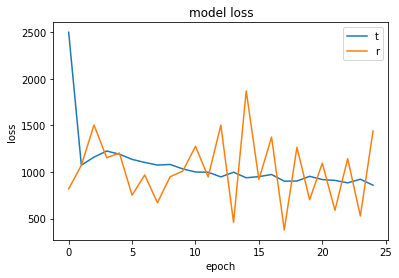

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train', loc='upper right')
plt.show()

In [11]:
#train_pred = autoencoder.predict(train)
#test_pred = autoencoder.predict(test)

In [24]:
dirct_test = os.getcwd()+ os.path.sep + "Test_set"
test_images  = list(paths.list_images(dirct_test))
len(test_images)

62

In [25]:
test_ls = []
for im in test_images:
    f = cv2.imread(im)
    f_bar = cv2.resize(f,(500,800))
    #inp = f.reshape(-1, f.shape[0], f.shape[1], f.shape[2])
    test_ls.append( f_bar)
    
test = np.array(test_ls)    

In [27]:
i=0
for t in test:
    p = autoencoder.predict(t.reshape(-1,train.shape[1], train.shape[2],train.shape[3]))
    d = p.reshape(train.shape[1], train.shape[2],-1)
    
    cv2.imwrite(test_images[i]+"_AE1.jpg", d)
    i=i+1
    
#test_AE = autoencoder.predict(test)

In [22]:
! pip install h5py

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [64]:
model_json = autoencoder.to_yaml()
with open("model_AllImage.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("model_AllImage.h5")
print("Saved model to disk")
print("Saved model to disk")

Saved model to disk
Saved model to disk
